In [1]:
# initialized connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2 as pg

In [2]:
# read pwd string from save file
with open('postgrest_pwd.txt', 'r') as f:
    pwd = f.readline()

In [3]:
# read data from table to datatframe with Month form 201801
table = 'mis_cc_kpi_m'
with pg.connect(database='ktc', user='postgres', password=pwd) as con:
    df = pd.read_sql('select * from ' + table + ' where "month"::bigint >= 201801', con = con)

## Oss Credit card by month
### Approved performance

#### Finalized

In [4]:
df_gr = df.groupby(['month', 'channel', 'channel_sub'])
df_gr['finalized'].sum().unstack(0).applymap("{:,d}".format)

month                201801  201802  201803  201804  201805
channel channel_sub                                        
OSS     Direct       17,962  21,491  21,146  16,711  22,006
        OSS_Tele      1,184   1,275   1,158   1,495   1,744
Tele    Telesales     3,677   4,752   5,913   4,476   6,444

#### Approve-new

In [5]:
df_gr['appr_new'].sum().unstack(0).applymap("{:,d}".format)

month               201801 201802 201803 201804 201805
channel channel_sub                                   
OSS     Direct       6,693  8,017  7,741  6,099  8,482
        OSS_Tele       530    496    459    607    790
Tele    Telesales    1,472  1,544  1,931  1,538  2,124

#### % Appr-rate

In [16]:
(df_gr['appr'].sum()/df_gr['finalized'].sum()).unstack(0).applymap("{:.0%}".format)

month               201801 201802 201803 201804 201805
channel channel_sub                                   
OSS     Direct         42%    42%    40%    42%    44%
        OSS_Tele       46%    40%    41%    42%    52%
Tele    Telesales      43%    42%    41%    37%    35%

#### Credit limit new

In [7]:
(df_gr['credit_limit_new'].sum()/df_gr['appr_new'].sum()).unstack(0).applymap("{:,.0f}".format)

month                201801  201802  201803  201804  201805
channel channel_sub                                        
OSS     Direct       51,233  53,753  46,022  53,392  50,258
        OSS_Tele     54,630  43,952  40,033  36,219  43,983
Tele    Telesales    52,739  52,141  50,016  46,664  47,761

#### % active60D

In [8]:
(df_gr['active60'].sum()/df_gr['appr_new'].sum()).unstack(0).applymap("{:.0%}".format)

month               201801 201802 201803 201804 201805
channel channel_sub                                   
OSS     Direct         61%    62%    60%    54%    37%
        OSS_Tele       71%    75%    70%    66%    48%
Tele    Telesales      86%    86%    85%    79%    65%

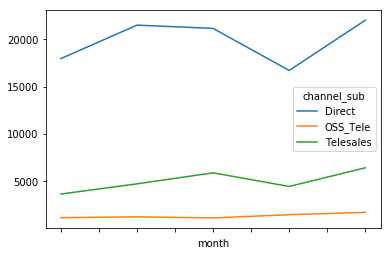

In [10]:
df.groupby(['channel_sub', 'month'])['finalized'].sum().unstack(0).plot()

In [11]:
df_gr[['finalized', 'appr_new']].sum().stack().unstack(0).applymap("{:,d}".format)

month                          201801  201802  201803  201804  201805
channel channel_sub                                                  
OSS     Direct      finalized  17,962  21,491  21,146  16,711  22,006
                    appr_new    6,693   8,017   7,741   6,099   8,482
        OSS_Tele    finalized   1,184   1,275   1,158   1,495   1,744
                    appr_new      530     496     459     607     790
Tele    Telesales   finalized   3,677   4,752   5,913   4,476   6,444
                    appr_new    1,472   1,544   1,931   1,538   2,124

In [ ]:
# group by , sum, reset MultiIndex -> DataFrame
i = df_gr[['finalized', 'appr', 'appr_new']].sum().reset_index()
# create per apr from appr_new / finalzied
i['per_apr'] = (i['appr_new']/i['finalized'])
# Set style
i.style.format({'finalized':"{:,.0f}", 'appr':"{:,.0f}", 'appr_new':"{:,.0f}"}).format({'per_apr':"{:,.0%}"})

### Top Reason
#### top Decline

In [51]:
df[df.result == 'R'].groupby(['month', 'channel','result_description'])

,1sm,1sm_name,1m,1m_name,dm,dm_name,sm,sm_name,m,m_name,...,cust_age_range,cust_inc_range,occupation_desc,bkk_upc,region,sub_region,province_thai,province_eng,province_type,strategic
0,SM1,Chayapha,M22,Nantusporn,None,None,SM1,Chayapha,M22,Nantusporn,...,20-26,15-19.9k,ตำรวจ,UPC,E,East,สระแก้ว,Sa Kaeo,Rural,จังหวัดปกติ
1,SM1,Chayapha,M22,Nantusporn,None,None,SM1,Chayapha,M22,Nantusporn,...,10-19,15-19.9k,ตำรวจ,UPC,N,North(Upper),อุตรดิตถ์,Uttaradit,Rural,จังหวัดปกติ
3,SM1,Chayapha,M22,Nantusporn,None,None,SM1,Chayapha,M22,Nantusporn,...,20-26,15-19.9k,ตำรวจ,UPC,C,Cen,สระบุรี,Saraburi,Industry,18 จังหวัดกลยุทธ์
4,SM1,Chayapha,M22,Nantusporn,None,None,SM1,Chayapha,M22,Nantusporn,...,20-26,20-29.9k,ช่างเทคนิค,UPC,E,East,ปราจีนบุรี,Prachin Buri,Rural,จังหวัดปกติ
5,SM1,Chayapha,M22,Nantusporn,None,None,SM1,Chayapha,M22,Nantusporn,...,51-60,20-29.9k,ข้าราชการ,UPC,NE,NorthEast(Lower),นครราชสีมา,Nakhon Ratchasima,Big City,18 จังหวัดกลยุทธ์
9,SM1,Chayapha,M22,Nantusporn,None,None,SM1,Chayapha,M22,Nantusporn,...,31-40,20-29.9k,ข้าราชการ,UPC,W,West,นครปฐม,Nakhon Pathom,Vicinity,จังหวัดปริมณฑล
10,SM1,Chayapha,M22,Nantusporn,None,None,SM1,Chayapha,M22,Nantusporn,...,31-40,15-19.9k,นักการเงิน,UPC,W,West,นครปฐม,Nakhon Pathom,Vicinity,จังหวัดปริมณฑล
12,SM1,Chayapha,M22,Nantusporn,None,None,SM1,Chayapha,M22,Nantusporn,...,31-40,20-29.9k,*พนักงานประจำ/ลูกจ้างประจำ,UPC,NE,NorthEast(Lower),นครราชสีมา,Nakhon Ratchasima,Big City,18 จังหวัดกลยุทธ์
13,SM1,Chayapha,M22,Nantusporn,None,None,SM1,Chayapha,M22,Nantusporn,...,41-50,40-49.9k,*พนักงานประจำ/ลูกจ้างประจำ,UPC,NE,NorthEast(Lower),นครราชสีมา,Nakhon Ratchasima,Big City,18 จังหวัดกลยุทธ์
15,SM1,Chayapha,M22,Nantusporn,None,None,SM1,Chayapha,M22,Nantusporn,...,26-30,15-19.9k,*พนักงานประจำ/ลูกจ้างประจำ,BKK,BKK&Peri,BKK_Metro,กรุงเทพมหานคร,Bangkok Metropolis,Big City,18 จังหวัดกลยุทธ์
